In [2]:
using Plots
Plots.gr()
using LaTeXStrings
using QuadGK
using ProgressMeter

In [3]:
return 3

3

In [4]:
display("text/javascript", "Jupyter.notebook.set_autosave_interval(30000)")

In [5]:
function A_Z_beta_BE() #BE: Binding Energy
    filename = "EMASS_DAT/EMASS_A_16-132.DAT"
    totalrows = countlines(open( filename, "r" ))
    open( filename, "r" ) do fp
        u_A = 0
        u_Z = 0
        u_beta = 0.0
        u2 = zeros(Float64,totalrows,4)
        u3 = zeros
        cnt = 0
        for line in eachline( fp )
            cnt += 1
            u = split(line, "\t")
            u1 = split(u[1], r"\s+")

            #Aを格納
            u_A = parse(Float64, u1[1])
            u2[cnt,1] = u_A
            #Zを格納
            u_Z = parse(Float64, u1[2])
            u2[cnt,2] = u_Z
            #betaを格納
            u_beta = parse(Float64, u1[3])
            u2[cnt,3] = u_beta
            #Binding Energyを格納
            u_BE = parse(Float64, u1[7]) #理論値を採用
            u2[cnt,4] = u_BE
        end
        u2
    end
end
data_beta = A_Z_beta_BE()
data_beta[1:10,:]

10×4 Array{Float64,2}:
 24.0  16.0  0.2404  -122.11 
 25.0  16.0  0.2083  -144.985
 26.0  16.0  0.1775  -170.536
 27.0  16.0  0.1043  -191.118
 28.0  16.0  0.0449  -214.832
 29.0  16.0  0.0461  -230.193
 30.0  16.0  0.0484  -248.073
 31.0  16.0  0.0701  -259.56 
 32.0  16.0  0.0922  -273.335
 33.0  16.0  0.1146  -281.623

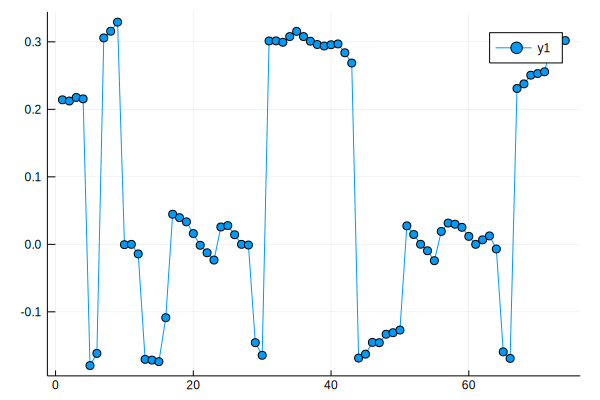

In [6]:
function A_Z_beta_BE_exp() #BE: Binding Energy
    filename = "EMASS_DAT/EMASS_A_16-132.DAT"
    totalrows = countlines(open( filename, "r" ))
    open( filename, "r" ) do fp
        u_A = 0
        u_Z = 0
        u_beta = 0.0
        u2 = zeros(Float64,totalrows,4)
        u3 = zeros
        cnt = 0
        for line in eachline( fp )
            cnt += 1
            u = split(line, "\t")
            u1 = split(u[1], r"\s+")

            #Aを格納
            u_A = parse(Float64, u1[1])
            u2[cnt,1] = u_A
            #Zを格納
            u_Z = parse(Float64, u1[2])
            u2[cnt,2] = u_Z
            #betaを格納
            u_beta = parse(Float64, u1[3])
            u2[cnt,3] = u_beta
            #Binding Energyを格納
            u_BE = parse(Float64, u1[6]) #実験値を採用
            u2[cnt,4] = u_BE
        end
        u2
    end
end
# A_Z_beta_BE_exp()[[A_Z_beta_BE_exp()[:,2].==40,:],:]
# plot(A_Z_beta_BE_exp()[A_Z_beta_BE_exp()[:,2].==40,:][:,3], marker = :circle)
plot(A_Z_beta_BE_exp()[A_Z_beta_BE_exp()[:,2].==40,:][:,3],marker = :circle)

In [7]:
function beta_2(A, Z)  
    data_beta[data_beta[:,1].==A,:][data_beta[data_beta[:,1].==A,:][:,2].==Z,:][3]
end

function BE(A, Z)  
    data_beta[data_beta[:,1].==A,:][data_beta[data_beta[:,1].==A,:][:,2].==Z,:][4]
end

BE (generic function with 1 method)

### 実験値のBEを返す関数`BE_exp(A,Z)`

In [8]:
function BE_exp(A, Z)  
    A_Z_beta_BE_exp()[A_Z_beta_BE_exp()[:,1].==A,:][A_Z_beta_BE_exp()[A_Z_beta_BE_exp()[:,1].==A,:][:,2].==Z,:][4]
end

BE_exp (generic function with 1 method)

In [9]:
println([BE(105,40), BE_exp(105,40)],[BE(105,41), BE_exp(105,41)])

[-877.723, 0.0][-885.197, -886.266]


## $a_c \frac{Z(Z-1)}{A^{1/3}}(1 - Z^{-2/3}) (1 + b_2 \beta_2)$ を計算

In [10]:
function deform(A, Z)
    g1 = 0.00862
    g2 = -0.4730
    k = 2
    b2 = (k/2) * g1 * A^(1/3) + (k/2)^2 * g2 * A^(-1/3)
    deform_term = 1 + b2 * (beta_2(A, Z))^2
end

function coulomb_deform(A, Z) #deformの効果あり -> [1] なし ->[2]    
    coulomb_energy = zeros(2)
    a_c = 0.7173
    coulomb_energy[1] = a_c * Z * (Z - 1) * (1/A^(1/3)) * (1 - Z^(-2/3)) * deform(A ,Z)
    coulomb_energy[2] = a_c * Z * (Z - 1) * (1/A^(1/3)) * (1 - Z^(-2/3)) #* deform_1636(A ,Z)
    return coulomb_energy
end

function E_IAS(A, Z) #deformの効果あり -> [1] なし ->[2]
    coulomb差 = zeros(2)
    for i in 1:2
        coulomb差[i] = coulomb_deform(A, Z+1)[i] - coulomb_deform(A, Z)[i]
    end
    coulomb差
end
deform(54,20), coulomb_deform(54,20), E_IAS(54,20)

(0.9973564350274408, [62.1619, 62.3267], [7.01825, 6.9069])

### $Q$-value minus になっているものもある??

In [11]:
function Q_value_E(A, Z)
    ΔnH = 0.7825 #中性子の質量 - 水素原子の質量
    Q値 = -BE(A, Z+1) + BE(A, Z) + ΔnH
end

Q_value_E (generic function with 1 method)

### 実験値から得たQ値

In [12]:
function Q_value_E_exp(A, Z)
    ΔnH = 0.7825 #中性子の質量 - 水素原子の質量
    Q値 = -BE_exp(A, Z+1) + BE_exp(A, Z) + ΔnH
end
function Q_value_E_Qexp(A, Z)
    ΔnH = 0.7825 #中性子の質量 - 水素原子の質量
    Q値 = -BE_exp(A, Z+1) + BE_exp(A, Z) + ΔnH
end

Q_value_E_Qexp (generic function with 1 method)

$Q$値の理論(WS)と実験の比較

In [13]:
# function plot_Q_th_vs_exp(A_range, Z_range)
#     data1 = [ Q_value_E(A, Z) for A = A_range, Z = Z_range ]
#     data2 = [ Q_value_E_Qexp(A, Z) for A = A_range, Z = Z_range ]
#     data = [data1,data2]
#     labels = ["theory", "experiment"]
#     savefig("Graph/A = $A_range Z = $Z_range")
#     if typeof(b_e_n3[b_e_n3[:,2].==40,:][:,1]) == Array{Float64,1}
#         A1 = Int(b_e_n3[b_e_n3[:,2].==40,:][:,1][1])
#         A2 = Int(b_e_n3[b_e_n3[:,2].==40,:][:,1][end])
#         plot(data, 
#              label = labels,
#              marker = :circle, 
#              yaxis = "Q-val",
#              title = "A = $A1 : $A2 , Z = $Z_range")
#     else
#         plot(data, 
#              label = labels,
#              marker = :circle, 
#              yaxis = "Q-val",
#              title = "A = $A_range Z = $Z_range")
#     end
# end

## Q-valueを実験値に置き換えるため，確認

In [14]:
# plot(plot_Q_th_vs_exp(90:100, 40), plot_Q_th_vs_exp(45:53, 20), layout = grid(1,2) )

In [15]:
# plot_Q_th_vs_exp(209:214, 82)

In [16]:
# typeof( plot([1,10,5]) )

## Q-val 実験データ 

In [17]:
# Q_value_E(50,20), Q_value_E(50,19), Q_value_E(50,21), λ_tot(50,20,4.0,21.0)
# 50    21     -0.1382      0.0211     -1.3764   -431.6754   -431.7653    -44.5370    -44.6269
# 50    20     -0.1595      0.0319     -0.8554   -427.4918   -425.7437    -39.5710    -37.8229
# 50    19     -0.1293      0.0260      1.1423   -414.1033   -411.1195    -25.4000    -22.4162

## Fermi energy $\epsilon_F$を求める
$ \epsilon_F = \frac{\hbar^2}{2M_n^*} \left( 3 \pi^2 \frac{N_1}{V}\right)^{2/3} $
$ \epsilon_F = \frac{76.52}{(M_n^*/M_n) r_0^2} \left( \frac{N_1}{A}\right)^{2/3} $
β-崩壊で$N_1 = N$(中性子数)

In [18]:
function fermi_energy(A, Z)
    r_0 = 1.2
    有効質量比 = 0.6 #M_n^* / M_n
    ε_F = 76.52 * (1/(有効質量比 * r_0^2)) * ((A - Z)/A)^(2/3)
end
fermi_energy(54,20)

65.06058895221219

## Pauli principleを考慮する項
$ 1 - \left( 1 - \frac{Q+E}{\epsilon_F} \right)^{3/2} $
Q_valueの正負に注意

In [19]:
pauli(A, Z, E) = 1 - (1 - (Q_value_E(A,Z) + E) / fermi_energy(A,Z))^(3/2)
pauli(54,20,-2.0)

0.2227368070934247

$\sigma_C = 0.157ZA^{-1/3}$

In [20]:
σ_c(A, Z) = 0.157 * Z * A^(-1/3)
σ_c(54,20)

0.8307398838633578

### Distribution function $D_F(E)$

In [21]:
D_F(A, Z, E) = 1/√(2 * π  * σ_c(A,Z)) * exp( -(E - E_IAS(A,Z)[1])^2 / (2 * σ_c(A, Z)^2))
D_F(54,20,-2.0)

1.1252859871486065e-26

# $E_{GT}$

In [143]:
一粒子状態 = [ [0, 1, 0, 1/2], 
              [1, 1, 1, 3/2], [1, 1, 1,1/2],
              [2, 1, 2, 5/2], [2, 2, 0, 1/2], [2, 1, 2, 3/2],
              [3, 1, 3, 7/2], [3, 2, 1, 3/2], [3, 1, 3, 5/2], [3, 2, 1, 1/2],
              [4, 1, 4, 9/2], [4, 1, 4, 7/2], [4, 2, 2, 5/2], [4, 2, 2, 3/2], [4, 3, 0, 1/2],
              [5, 1, 5, 11/2], [5, 1, 5, 9/2], [5, 2, 3, 7/2], [5, 2, 3, 5/2], [5, 3, 2, 3/2], [5, 3, 2, 1/2],
              [6, 1, 6, 13/2], [6, 2, 4, 9/2], [6, 3, 2, 5/2], [6, 1, 6, 11/2], [6, 2, 4, 7/2], [6, 4, 0, 1/2], [6, 3, 2, 3/2],
              [7, 1, 7, 15/2] ]
準位総数 = [0 for ii in 1:length(一粒子状態)]
for jj in 1:length(一粒子状態)
    for kk in 1:jj
    準位総数[jj] += 一粒子状態[kk][4] * 2 + 1
    end
end
魔法数_励起子数 = [2, 8, 20, 40, 70, 112, 168] #hbar omegaの数 $N$
function which_levels(核子数) 
    i_魔法数 = 2 #1p_{3/2}から考える
    #1s_{1/2}の場合は除外
    # N = 0
    if 核子数 == 1 || 核子数 == 2
        親状態 = [vcat(一粒子状態[1], 核子数)]
    # N = 1
    elseif 核子数 <= 魔法数_励起子数[2]
        親状態 = [vcat(一粒子状態[2], min(核子数 - 準位総数[1], (一粒子状態[2][4]*2 + 1))), 
                 vcat(一粒子状態[3], max(0, 核子数 - 準位総数[2]))]
    
    # N = 2
    elseif 核子数 <= 魔法数_励起子数[3]
        親状態 = [vcat(一粒子状態[4], min(核子数 - 準位総数[3], (一粒子状態[4][4]*2 + 1))),
                 vcat(一粒子状態[5], min(max(0, 核子数 - 準位総数[4]), (一粒子状態[5][4]*2 + 1))),
                 vcat(一粒子状態[6], max(0, 核子数 - 準位総数[5]))]
        
    # N = 3
    elseif 核子数 <= 魔法数_励起子数[4]
        親状態 = [vcat(一粒子状態[7], min(核子数 - 準位総数[6], (一粒子状態[7][4]*2 + 1))),
                 vcat(一粒子状態[8], min(max(0, 核子数 - 準位総数[7]), (一粒子状態[8][4]*2 + 1))),
                 vcat(一粒子状態[9], min(max(0, 核子数 - 準位総数[8]), (一粒子状態[9][4]*2 + 1))),
                 vcat(一粒子状態[10], max(0, 核子数 - 準位総数[9]))]
        
    # N = 4
    elseif 核子数 <= 魔法数_励起子数[5]
        ii = 10
        親状態 = [vcat(一粒子状態[ii + 1], min(核子数 - 準位総数[ii], (一粒子状態[ii + 1][4]*2 + 1))),
                 vcat(一粒子状態[ii + 2], min(max(0, 核子数 - 準位総数[ii + 1]), (一粒子状態[ii + 2][4]*2 + 1))),
                 vcat(一粒子状態[ii + 3], min(max(0, 核子数 - 準位総数[ii + 2]), (一粒子状態[ii + 3][4]*2 + 1))),
                 vcat(一粒子状態[ii + 4], min(max(0, 核子数 - 準位総数[ii + 3]), (一粒子状態[ii + 4][4]*2 + 1))),
                 vcat(一粒子状態[ii + 5], max(0, 核子数 - 準位総数[ii + 4]))]
        
    # N = 5
    elseif 核子数 <= 魔法数_励起子数[6]
        ii = 15
        親状態 = [vcat(一粒子状態[ii + 1], min(核子数 - 準位総数[ii], (一粒子状態[ii + 1][4]*2 + 1))),
                 vcat(一粒子状態[ii + 2], min(max(0, 核子数 - 準位総数[ii + 1]), (一粒子状態[ii + 2][4]*2 + 1))),
                 vcat(一粒子状態[ii + 3], min(max(0, 核子数 - 準位総数[ii + 2]), (一粒子状態[ii + 3][4]*2 + 1))),
                 vcat(一粒子状態[ii + 4], min(max(0, 核子数 - 準位総数[ii + 3]), (一粒子状態[ii + 4][4]*2 + 1))),
                 vcat(一粒子状態[ii + 5], min(max(0, 核子数 - 準位総数[ii + 4]), (一粒子状態[ii + 5][4]*2 + 1))),
                 vcat(一粒子状態[ii + 6], max(0, 核子数 - 準位総数[ii + 5]))]
        
    elseif 核子数 <= 魔法数_励起子数[7]
        ii = 21
        親状態 = [vcat(一粒子状態[ii + 1], min(核子数 - 準位総数[ii], (一粒子状態[ii + 1][4]*2 + 1))),
                 vcat(一粒子状態[ii + 2], min(max(0, 核子数 - 準位総数[ii + 1]), (一粒子状態[ii + 2][4]*2 + 1))),
                 vcat(一粒子状態[ii + 3], min(max(0, 核子数 - 準位総数[ii + 2]), (一粒子状態[ii + 3][4]*2 + 1))),
                 vcat(一粒子状態[ii + 4], min(max(0, 核子数 - 準位総数[ii + 3]), (一粒子状態[ii + 4][4]*2 + 1))),
                 vcat(一粒子状態[ii + 5], min(max(0, 核子数 - 準位総数[ii + 4]), (一粒子状態[ii + 5][4]*2 + 1))),
                 vcat(一粒子状態[ii + 6], min(max(0, 核子数 - 準位総数[ii + 5]), (一粒子状態[ii + 6][4]*2 + 1))),
                 vcat(一粒子状態[ii + 7], max(0, 核子数 - 準位総数[ii + 6]))]
        
    else
        ii = 28
        親状態 = [vcat(一粒子状態[ii + 1], min(核子数 - 準位総数[ii], (一粒子状態[ii + 1][4]*2 + 1)))]
        
    end
end

ξ_l_lis = [0, 0, 0.464, 1.29, 0.838, 0.509, 0.451]
xi_l(l) = ξ_l_lis[l+1]

function energy_Vls_braket(核子数)  
    energy_Vls_ブラケット = 0.0 #energy_Vlsのブラケット部分，
    
    if  (核子数 == 魔法数_励起子数[1] || 核子数 == 魔法数_励起子数[2] || 核子数 == 魔法数_励起子数[3] || 核子数 == 魔法数_励起子数[4] || 
         核子数 == 魔法数_励起子数[5] || 核子数 == 魔法数_励起子数[6] || 核子数 == 魔法数_励起子数[7] )
        energy_Vls_ブラケット = 0.0 
    else
        for ii in 1:length(which_levels(核子数))
            #2 ξ_l l(l+1)
            l = Int64(which_levels(核子数)[ii][3])
            占有率 = which_levels(核子数)[ii][5] / (which_levels(核子数)[ii][4] * 2 + 1)
            energy_Vls_ブラケット += 2( 占有率 * (xi_l(l) * 
                                    l * (l + 1)) )
        end
     end
    energy_Vls_ブラケット
end

energy_diff(中性子数, 陽子数, κ差) = ( (4 / 3)*(1 / (中性子数 - 陽子数)) * (energy_Vls_braket(中性子数) 
                                                                     + energy_Vls_braket(陽子数) ) 
                                    - ( 2 / (中性子数 + 陽子数) ) * κ差 * (中性子数 - 陽子数) )
E_diff(中性子数, 陽子数, κ差) = energy_diff(中性子数, 陽子数, κ差)
energy_diff(52,40,3.18), energy_diff(34,20,40.0)

(3.82599033816425, -16.809312169312168)

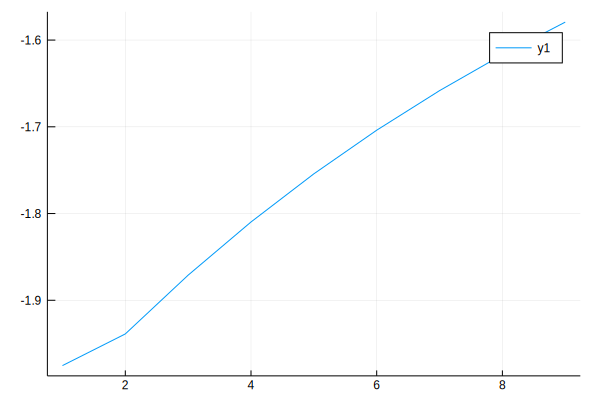

In [133]:
plot( [energy_diff(48 + ii,20,4.0) for ii = 1:9] )

## $D_{GT}$

In [24]:
E_GT(A,Z,κ差) = E_IAS(A,Z)[1] + energy_diff((A-Z), Z, κ差)
E_GT(54,20,4.0)

8.87560557016001

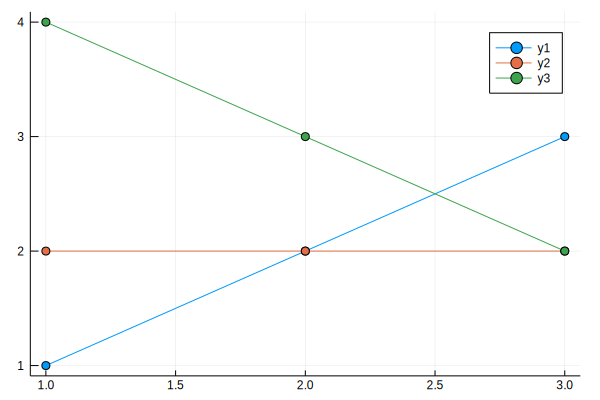

In [155]:
plot( [[1,2,3], [2,2,2], [4,3,2]], marker = :circle)

### $E_{GT}$,$E_{IAS}$をグラフ化

In [162]:
function plot_EgtEiasEdiff(Arange, Zrange, κ差) 
    labels = ["Energy of IAS", "Energy of GT", "Energy difference" ]
    data = [ [], [], [] ]
    
    if typeof(Arange) == UnitRange{Int64} && typeof(Zrange) != UnitRange{Int64}
        x_data  = [ A_i for A_i = Arange]
        data[1] = [ E_IAS(A_i,Zrange)[1] for A_i = Arange ]
        data[2] = [ E_GT(A_i,Zrange, κ差) for A_i = Arange ]
        data[3] = [ E_diff( ( A_i-Zrange ),Zrange, κ差 ) for A_i = Arange ]
        
#         plot( x_data, data,
#               label = labels,
#               xaxis = "Atomic number A",
#               yaxis = "Energy",
#               marker = :circle,
#               framestyle = :box)
        
#     elseif typeof(Arange) != UnitRange{Int64} && typeof(Zrange) == UnitRange{Int64}
#         x_data  = [ Z_i for Z_i = Zrange]
#         data[1] = [ E_IAS(Arang,Z_i) for Z_i = Zrange ]
#         data[2] = [ E_GT(Arange,Z_i, κ差) for Z_i = Zrange ]
#         data[3] = [ E_diff( ( Arange - Z_i ),Z_i, κ差 ) for Z_i = Zrange ]  
        
#         plot( x_data, data,
#               label = labels,
#               xaxis = "Proton number Z",
#               yaxis = "Energy",
#               marker = :circle,
#               framestyle = :box)
        
    else
        return "range設定を見直してください"
        
    end
    return data[3]
end
plot_EgtEiasEdiff(49:57,20,4.0)

9-element Array{Any,1}:
 3.117278911564626 
 2.528             
 2.0272370766488415
 1.5938461538461537
 1.7423512336719886
 1.8573544973544975
 1.9461818181818176
 2.0142857142857142
 2.0657997936016517

In [25]:
D_GT(A, Z, κ差,σ_GT, E) = (1/√(2 * π  * σ_GT) * exp( -(E - E_GT(A,Z,κ差))^2 / (2 * σ_GT^2)))
D_GT(54,20,4.0,12.0,-2.0)

0.07637635472925426

# $|G_F|^2 D_F + 3|G_GT|^2 D_{GT}$を求める
### 定数の準備

In [26]:
const G_Fermi = 8.9609e-5 #MeV fm^3 #from Wikipedia
const G_GT割るG_Fermi = -1.2699 #https://link.aps.org/doi/10.1103/RevModPhys.78.991
const G_GTel = G_Fermi * G_GT割るG_Fermi

-0.0001137944691

$ \frac{m_e^5 c^4}{2 \pi^3 \hbar^7} $

In [27]:
const mass_e = 0.5110 #MeV/c^2 form WIKI
const c_light = 2.9979e+23 #fm/s 
const hbar = 6.5821e-22 #MeV・s
const coeff_λ = mass_e^5 * c_light^(-6) * (1/ (2π^3 * hbar^7)) #1/s

14460.080186358078

# 被積分関数$ \left( |G_F|^2 D_F + 3|G_GT|^2 D_{GT} \right) \left[ 1- \left( 1 - \frac{Q+E}{\epsilon_F}\right)^{3/2} \right] f(-E)$ を作成
## Fermi functionを準備

In [28]:
b_1(Z) = ( 5.26 * exp(-6.65674 * 10.0^(-3) * Z - 6.41863 * 10.0^(-5) * Z^2 
           - 7.00193 * 10.0^(-6) * Z^3 + 4.74649 * 10.0^(-8) * Z^4) )

b_2(Z) = 9.8 - 7.03 * 10.0^(-2) * Z - 1.28 * 10.0^(-3) * Z^2 + 2.84 * 10.0^(-5) * Z^3

b_3(Z) = 2.0 * exp(-0.5Z) + 8.5 + 6.0*10.0^(-4) * Z^2

a(Z) = (1.52*10.0^(-2) * Z + 6.40*10.0^(-6) * Z^3 + 8.50 * 10.0^(-11) * Z^5 
        + 1.70 * 10.0^(-13) * Z^7 + 2.50 * 10.0^(-26) * Z^13)
c(Z) = 3.33*10.0^(-2) * exp(3.11*10.0^(-2) * Z)
d(Z, E_0) = 0.132 * E_0^(7/2) * exp(-0.5Z) / (1 + 2.805E_0^5)
g(Z, E_0) = b_1(Z) + ( (E_0 - b_3(Z)) / b_2(Z) )^5
ag(Z, E_0) = a(Z) * E_0^3 + (1/g(Z,E_0)) * E_0^4
agc(Z, E_0) = a(Z) * E_0^3 + (1/g(Z,E_0)) * E_0^4 + c(z) * E_0^5

fermi_func(Z, E_0) = a(Z) * E_0^3 + (1/g(Z,E_0)) * E_0^4 + c(Z) * E_0^5 + d(Z,E_0)
@time fermi_func(22, 2.0)

  0.099508 seconds (176.95 k allocations: 9.646 MiB)


9.693044347385682

In [29]:
E_00(Z) = b_3(Z) + (-1) * b_1(Z)^(1/5) * b_2(Z)

E_00 (generic function with 1 method)

In [30]:
E_00(33)

0.16356081313995396

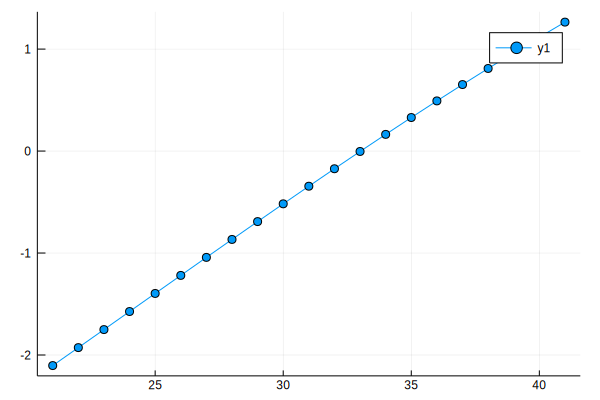

In [31]:
E_00_i = [E_00(ii) for ii = 20:40]
x_E = [ii+20 for ii = 1:21]
using Plots
Plots.gr()
plot(x_E, E_00_i, marker =:circle)

## $g(Z)$の発散部分を取り扱う

In [32]:
plot_g(A,Z) = plot( [ g( Z, xx) for xx = 0:0.1:Q_value_E(A,Z)] )

plot_g (generic function with 1 method)

In [33]:
function plot_g2(A1,A2,Z)
    data = []
    for ii = A1:A2
        append!( data, [ g( Z, xx) for xx = 0 : Q_value_E(ii,Z)/100 : Q_value_E(ii,Z) ] )
    end
    savefig("Graph/g_func A=$A1 : $A2 Z=$Z")
    plot(data,
         framestyle = :box)
end

plot_g2 (generic function with 1 method)

0を跨がず，単調増加の場合，上手く計算できる．

In [34]:
function g_判別(A::Int64,Z::Int64)
    g_lis = [ g( Z, xx) for xx = 0 : Q_value_E(A,Z)/100 : Q_value_E(A,Z) ]
    return minimum(g_lis) * maximum(g_lis) > 0 && g_lis[1] < g_lis[end]
end

g_判別 (generic function with 1 method)

In [35]:
function g_判別_Qexp(A::Int64,Z::Int64)
    g_lis = [ g( Z, xx) for xx = 0 : Q_value_E_Qexp(A,Z)/100 : Q_value_E_Qexp(A,Z) ]
    return minimum(g_lis) * maximum(g_lis) > 0 && g_lis[1] < g_lis[end]
end

g_判別_Qexp (generic function with 1 method)

In [36]:
# function plot_intg2(A,Z)
#     savefig("Graph/g_func A=$A Z=$Z -v2")
#     plot([integrand_λ(A,Z,4.0,12.0,xx) for xx = -Q_value_E(A,Z):0.01:0.0],
#         framestyle = :box,
#         xaxis = L"\rm{Q-value}",
#         yaxis = L"\rm{integrand}\;\lambda(A,Z)",
#         label = "")
# end
        
# plot_intg2(55,20)

In [37]:
# λ_tot(105,44,4.0,12.0)

## 被積分関数を作る

In [38]:
integrand_λ(A,Z,κ差,σ_GT,E) = (G_Fermi^2 * D_F(A,Z,E) + 3 * G_GTel^2 * D_GT(A,Z,κ差,σ_GT,E)) * pauli(A, Z, E) * fermi_func(Z, -E)
integrand_λ(85,39,4.0,12.0,-0.1), D_F(77,33,-0.1), D_GT(77,33,4.0,12.0,-0.1) , pauli(77, 33, -0.1),fermi_func(33, 0.1), Q_value_E(50,20)

(-4.5469463001908996e-14, 4.0025523465293196e-17, 0.05108975359861686, 0.029743919657453044, -0.00011801369503630864, 6.804100000000035)

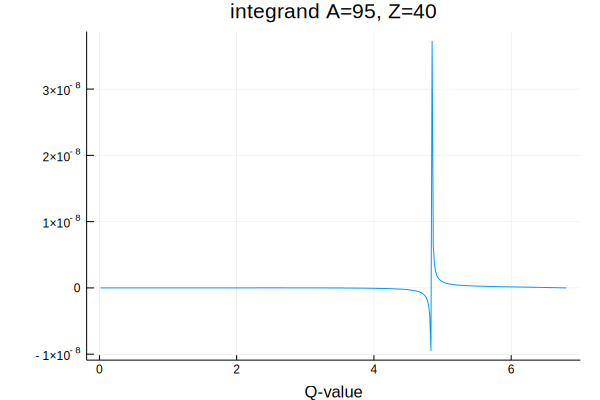

In [39]:
function plot_intg_l(A,Z)
    x_intg = [0.0 + (ii/400)*(6.804) for ii = 1:400]
    integrand_lambda_i = [integrand_λ(A,Z,4.0,12.0, -(ii/400)*(Q_value_E(A,Z))) for ii = 1:400]
    plot(x_intg, integrand_lambda_i,
         xaxis = "Q-value",
         label = "",
         title = "integrand A=$A, Z=$Z")
end
plot_intg_l(95,40)

In [40]:
# Q_gt0_plot(A,Z) = Q_value_E(A,Z) > 0 ? plot_intg_l(A,Z) : println("Q 値が負です")    
# # Q_gt0_plot(105,45)
# @time 計算可能なλ(105,45,5.0,12.0)

### `max_mean_diff_intg_l(A,Z)` のpeak検知が上手くいってないので，再考

In [41]:
#1.786
# λ_tot(105,44,4.0,12.0)
# plot([integrand_λ(78,33,4.0,12.0,xx) for xx = -Q_value_E(78,33):0.01:0.0])

### `max_mean_diff_intg_l(A,Z)`$ < 100$ の時は発散してるとして，除外
-> 失敗
### `g_判別`を使う

In [42]:
function 計算可能なλ(A::Int64,Z::Int64,κ差,σ_GT)
    if Q_value_E(A,Z) > 0.0 && g_判別(A,Z)
        return λ_tot(A,Z,κ差,σ_GT)
    else
        return 0.0
    end
end

function 計算可能なλ_2(array,κ差,σ_GT)
    l_th = []
    prog = Progress( Int(length(array) / 3) )
    for ii in 1:Int(length(array) / 3)
        lambda_tot = 計算可能なλ(array[ii,1],array[ii,2],κ差,σ_GT)
        if lambda_tot != 0.0
            append!(l_th, lambda_tot)
        end
        next!(prog)
    end
    return l_th
end
# @time 計算可能なλ(106,44,4.0,12.0)

計算可能なλ_2 (generic function with 1 method)

# Q-valueに実験データ

In [43]:
function 計算可能なλ_Qexp2(A, Z,κ差,σ_GT) 
    if Q_value_E_Qexp(A,Z) > 0.0 && g_判別_Qexp(A,Z) && BE_exp(A,Z) != 0.0
        return λ_tot_Qexp(A,Z,κ差,σ_GT)
    else
        return 0.0
    end
end

function 計算可能なλ_Qexp4(A, Z,κ差,σ_GT) 
    if Q_value_E_Qexp(A,Z) > 0.0 && g_判別_Qexp(A,Z) && BE_exp(A,Z) != 0.0
        return λ_tot_Qexp(A,Z,κ差,σ_GT)
    else
        return 0.0
    end
end

計算可能なλ_Qexp4 (generic function with 1 method)

In [44]:
# 計算可能なλ_Qexp2(50, 20, 4.0, 5.0)

In [45]:
# 計算可能なλ_Qexp2.(Int.(b_e_n3[1:10,1]),Int.(b_e_n3[1:10,2]),4.0,5.0)
# β_dataset[8,:]

In [46]:
# 計算可能なλ_Qexp2.(Int.(β_dataset[:,1]),Int.(β_dataset[:,2]),4.0,5.0)

In [47]:
Q_value_E_Qexp(53,20) > 0.0 && g_判別(53,20) && BE_exp(53,20) != 0.0

false

In [48]:
# count(i -> i != 0.0, 計算可能なλ_Qexp.(Int.(b_e_n3[:,1]),Int.(b_e_n3[:,2]),4.0,5.0))

## 実験データからA,Zを呼び出して，計算可能なものだけ計算させる

In [49]:
fermi_z = [fermi_func(37, ii/1000) for ii = 1:1000]
x_f = [0.0 + ii/1000 for ii = 1:1000]
# data = [fermi_z, frac_g_z]
# using Plots
# Plots.gr()
# plot(data[1])

1000-element Array{Float64,1}:
 0.001
 0.002
 0.003
 0.004
 0.005
 0.006
 0.007
 0.008
 0.009
 0.01 
 0.011
 0.012
 0.013
 ⋮    
 0.989
 0.99 
 0.991
 0.992
 0.993
 0.994
 0.995
 0.996
 0.997
 0.998
 0.999
 1.0  

In [50]:
fermi_z[19], fermi_z[20]

(6.151736752794591e-6, 7.170013658971182e-6)

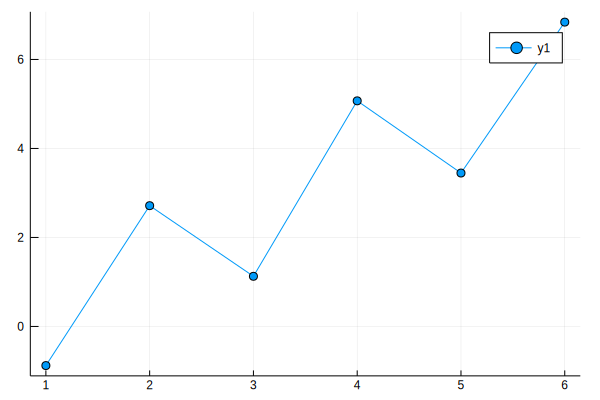

In [51]:
Q_z = [Q_value_E(ii,25) for ii = 55:60]
using Plots
Plots.gr()
plot(Q_z, marker=:circle)

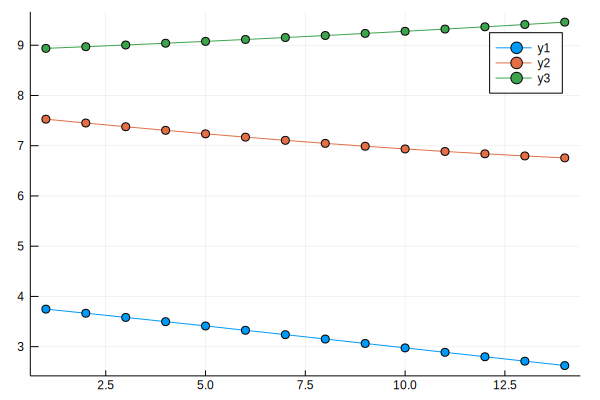

In [52]:
b1_z = [b_1(ii) for ii = 27:40]
b2_z = [b_2(ii) for ii = 27:40]
b3_z = [b_3(ii) for ii = 27:40]
data = [b1_z, b2_z, b3_z]
using Plots
Plots.gr()
plot(data, marker=:circle)

## 積分する

In [53]:
quadgk(x -> x^3, -1, 1)

(-1.856611517086701e-17, 0.0)

In [54]:
function λ_tot(A::Int64,Z::Int64,κ差,σ_GT)
    Q_val = Q_value_E(A,Z)
    int_D(E) = integrand_λ(A,Z,κ差,σ_GT,E)
    積分結果 = quadgk(int_D, -Q_val, 0.0)[1] 
    λ_tot = coeff_λ * (A-Z) * 積分結果
end
@time λ_tot(50,20,5.0,20.0)

  1.442580 seconds (3.39 M allocations: 251.330 MiB, 8.07% gc time)


0.056316164052958195

In [55]:
function λ_tot_Qexp(A::Int64,Z::Int64,κ差,σ_GT)
    if BE_exp(A,Z) != 0.0
        Q_val = Q_value_E_Qexp(A,Z)
        int_D(E) = integrand_λ(A,Z,κ差,σ_GT,E)
        積分結果 = quadgk(int_D, -Q_val, 0.0)[1] 
        λ_tot = coeff_λ * (A-Z) * 積分結果
    else
        λ_tot = 0.0
    end
end
# count(i -> i != 0, λ_tot_Qexp.(Int.(b_e_n3[:,1]),Int.(b_e_n3[:,2]),4.0,5.0))

λ_tot_Qexp (generic function with 1 method)

# 実験データを準備

In [56]:
YMD = Dict{String, Float64}("FS" => 1.0e-15, "PS" => 1.0e-12, "NS" => 1.0e-9, 
        "US" => 1.0e-6, "MS" => 1.0e-3, "S" => 1.0, "M" => 60.0, 
        "H" => 3.6e3, "D" => 8.64e4, "Y" => 3.154e7 )
YMD["FS"]

function ymdからsec(txt)
    getindex(YMD, txt)
end
ymdからsec("MS")

function Elem_2_Z(txt)
    filename = "EMASS_DAT/Element_Number.csv"
    totalrows = countlines(open( filename, "r" ))
    Z_num = 0
    open( filename, "r" ) do fp
        for line in eachline( fp )
            uppercase(split(line, ",")[2]) == txt ?  Z_num = parse(Int, split(line, ",")[1]) : nothing
        end
    end
    return Z_num
end
Elem_2_Z("AR")

function textからAとZ(t)
    t_spl = split(t, "")
    t_spl_int = tryparse.(Int, t_spl)
    num_cnt = 0
    atom_num = 0
    element_sign = ""
    proton_num = 0
    A_and_Z = zeros(2)

    for ii = 1:length(t_spl)
        typeof(t_spl_int[ii]) == Int ? num_cnt += 1 : nothing
    end

    for ii = 1:num_cnt
        atom_num += t_spl_int[ii] * 10^(num_cnt-ii)
    end

    A_and_Z[1] = atom_num

    for ii = num_cnt+1:length(t_spl)
        element_sign = element_sign * t_spl[ii]
    end
    A_and_Z[2] = Elem_2_Z(element_sign)
    A_and_Z
end
textからAとZ("36S")

function textからbeta_1(txt)
    数字部分 = parse(Float64, replace(txt, "(" =>""))
end

function textからbeta_2(txt)
    if length(txt) <= 2
        単位 = ymdからsec( txt )
    else
        単位 = ymdからsec( split(txt, "")[1] )
    end
end

function textからbeta(txt1, txt2)
    textからbeta_1(txt1) * textからbeta_2(txt2)
end
textからbeta("(12.3", "H")

44280.0

### 半減期の情報の行だけを取り出す．

In [57]:
function beta_experi() #BE: Binding Energy
    filename = "EMASS_DAT/beta_data_exp.txt"
    totalrows = countlines(open( filename, "r" ))
    open( filename, "r" ) do fp
        u = [[] for ii in 1:totalrows]
        u_str = ["" for ii in 1:totalrows]
        u_out = ["" for ii in 1:totalrows]
        cnt = 0
        for line in eachline( fp )
            cnt += 1
            u[cnt] = split(line, "\t")
            u_str[cnt] = string(u[cnt])
            if length(split(u_str[cnt], r"\s+")) <= 6
                u_out[cnt] = ""
            else
                if split(u_str[cnt], r"\s+")[1] == "Any[\""
                    if split(u_str[cnt], r"\s+")[4] == "B-"
                        u_out[cnt] = u_str[cnt]
                    else
                        u_out[cnt] = ""
                    end
                else
                    if split(u_str[cnt], r"\s+")[3] == "B-"
                        u_out[cnt] = u_str[cnt]
                    else
                        u_out[cnt] = ""
                    end
                end
            end
        end
        u_out
    end
end
beta_exp3 = deepcopy(beta_experi())
beta_exp3[1]

"Any[\" 32S     32P B- DECAY (14.268 D)       2002UN02,1994CO02,1979PR1411NDS    201109\"]"

In [58]:
function line_num(beta_array)
    cnt = 0
    for ii = 1:length(beta_array)
        if beta_array[ii] == ""
            cnt += 0
        else
            cnt += 1
        end
    end
    
    beta_line = ["" for ii=1:cnt]
    cnt2 = 0
    for ii = 1:length(beta_array)
        if beta_array[ii] != ""
            cnt2 += 1
            beta_line[cnt2] = beta_array[ii]
        end
    end
    
    beta_line
end
beta_lines = deepcopy(line_num(beta_exp3))
beta_lines[1]

"Any[\" 32S     32P B- DECAY (14.268 D)       2002UN02,1994CO02,1979PR1411NDS    201109\"]"

In [59]:
# arraay_spl = ["73NI", 73CO" , "B-", "DECAY", "(LT",  "40.7", "MS )",,, ]
function 半減期の行をファイルに書き込む(array1, array2, str)
    if string(array1[5][1] ) == "(" && string(array1[5][2] ) != "L"
        array2 = replace(array2, ")" =>" )")
        open( "EMASS_DAT/beta_data_v11.3", "a" ) do fp
             write( fp, array1 * "\n" )
        end
    end
end
ahoge = split("73NI    73CO B- DECAY ( 40.7 MS )       2012RA10                  ENSDF    201603", r"\s+" )
半減期の行をファイルに書き込む("ahoge", ahoge, "v11.1")

In [60]:
beta_lines_2 = [ "" for ii = 1:length(beta_lines) ]
beta_lines_3 = [ "" for ii = 1:length(beta_lines) ]
beta_9 = [ "" for ii = 1:9]
for ii in 1:length(beta_lines)
    beta_lines_2[ii] = replace(beta_lines[ii], "Any[\"" => "")
    beta_9 = split(beta_lines_2[ii], r"\s+")
    filter!(e->e!="",beta_9)    
    if beta_9[4] == "DECAY"
        beta_lines_3[ii] = beta_lines_2[ii] 
        if string(beta_9[5][1] ) == "(" && string(beta_9[5][2] ) != "L"
            beta_lines_3[ii] = replace(beta_lines_2[ii], ")" =>" )")
            open( "beta_data_v12", "a" ) do fp
                 write( fp, beta_lines_3[ii]*"\n" )
            end         
        end       
    end
end
beta_lines_3[1]

" 32S     32P B- DECAY (14.268 D )       2002UN02,1994CO02,1979PR1411NDS    201109\"]"

In [61]:
#  73NI    73CO B- DECAY (40.7 MS )       2012RA10                  ENSDF    201603"
function half_lives_pre(array)
    AとZとbeta_pre = zeros(3)
    array_spl = split(array, r"\s+")
    filter!(e->e!= "", array_spl) 
    AとZとbeta_pre[1:2] = textからAとZ(array_spl[1])
    AとZとbeta_pre[3] = textからbeta( array_spl[5], array_spl[6] )
    return AとZとbeta_pre
end
half_lives_pre(   "258NO    258MD B- DECAY (57.0 M ):?                               17NDS    201709\"]" )[1]

258.0

In [62]:
# b_exp = vcat( beta_exp_10,beta_exp_20,beta_exp_30,beta_exp_40,beta_exp_50,beta_exp_60,beta_exp_70,beta_exp_80,
#       beta_exp_90,beta_exp_100,beta_exp_110,beta_exp_120,beta_exp_130 )
# b_exp[1]

In [63]:
# open("EMASS_DAT/beta_experiment_data_vm2", "w") do fp
#     for ii = 1:Int(length(b_exp)/3)
#         print(fp, b_exp[ii,:],"\n")
#     end
# end

### 同じ核種のデータは最新の方を採用

In [64]:
fname = "EMASS_DAT/beta_experiment_data_vm2"
trows = countlines(open( fname, "r" ))
b_e2 = ["" for ii = 1:trows]
open(fname, "r") do fp
    cnt = 0
    for line in eachline( fp )
        cnt += 1
        b_e2[cnt] = line
    end
end  


function 最新のデータのみ(array)
    ii = 1
    while ii + 1 <= length(array)
        if ( split(array[ii], ",")[1] == split(array[ii+1], ",")[1] &&
             split(array[ii], ",")[2] == split(array[ii+1], ",")[2] )
            deleteat!( array, ii )
        end
        ii += 1
    end
    array
end
b_e_n = 最新のデータのみ(b_e2) #b_e_n = beta_experiment_new

function 文字から数字(str)
    str1 = split(str, ",")[1]
    str2 = split(str, ",")[2]
    str3 = split(str, ",")[3]
    nstr1 = parse( Float64, replace(str1, "["=>"") )
    nstr2 = parse( Float64, str2 )
    nstr3 = parse( Float64, replace(str3, "]"=>"") )
    nstr = [nstr1, nstr2, nstr3]
end

b_e_n2 = zeros(length(b_e_n), 3)
for ii in 1:length(b_e_n)
    b_e_n2[ii,:] = 文字から数字(b_e_n[ii])
end

In [65]:
半減期2崩壊率(t12) = log(2) / t12

半減期2崩壊率 (generic function with 1 method)

In [66]:
b_e_n3 = zeros(Int( length(b_e_n2) / 3) , 3)
for ii in 1:Int( length(b_e_n2) / 3) 
    b_e_n3[ii,1] = b_e_n2[ii,1]
    b_e_n3[ii,2] = b_e_n2[ii,2]
    b_e_n3[ii,3] = 半減期2崩壊率(b_e_n2[ii,3])
end
const β_dataset = deepcopy(b_e_n3)

433×3 Array{Float64,2}:
  32.0   16.0  5.62273e-7 
  33.0   16.0  3.16471e-7 
  34.0   16.0  0.0557641  
  35.0   16.0  0.0146543  
  35.0   17.0  9.18225e-8 
  36.0   16.0  0.123776   
  36.0   18.0  7.30125e-14
  37.0   16.0  0.300064   
  37.0   17.0  0.00228761 
  38.0   16.0  1.08304    
  38.0   17.0  6.78359e-5 
  38.0   18.0  0.0003103  
  39.0   16.0  2.47553    
   ⋮                      
 236.0   94.0  8.55737e-6 
 240.0   93.0  1.36554e-5 
 240.0   94.0  0.00160006 
 242.0   94.0  0.00210045 
 242.0   96.0  1.20188e-5 
 244.0   96.0  0.000444325
 246.0   96.0  0.000462098
 248.0   98.0  8.12409e-6 
 249.0   98.0  2.43107e-8 
 254.0  100.0  4.89926e-6 
 256.0  100.0  2.53343e-5 
 258.0  102.0  0.000202675

In [67]:
Q_value_E(75,31)# λ_tot(75,31,4.0,12.0)

4.456499999999978

In [68]:
# open("EMASS_DAT/beta_experiment_data_v5", "w") do fp
#     for ii = 1:Int(length(b_e_n3)/3)
#         print(fp, b_e_n3[ii,:],"\n")
#     end
# end

# 実験データ描画

In [69]:
function b_e(a, z) 
    b_A = b_e_n2[b_e_n2[:,1].==a,:]
    b_A[b_A[:,2].==z,:][3]
end
b_e(236.0,94.0)

81000.0

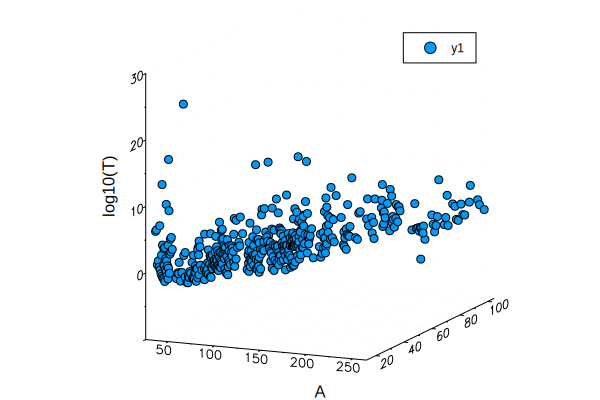

In [70]:
using Plots
Plots.gr()
plot( b_e_n2[:,1], b_e_n2[:,2], log.(10, b_e.(b_e_n2[:,1],b_e_n2[:,2])),
      xaxis = "A", yaxis = "log10(T)",
      st = :scatter)

# 実験値との差
$ \lambda_{\rm{tot}} - \rm{EXP\_DATA}$

## $\alpha$ 版完成

In [71]:
function 誤差_rms(kappa_d::Float64, sigma_gt::Float64, array)
    progress = Progress( Int( length( array ) / 3.0 ) )
    count = 0
    sum = 0.0
    for ii = 1 : Int( length( array ) / 3.0 )
        A = Int64( array[ii,1] )
        Z = Int64( array[ii,2] )
        lambda_tot = 計算可能なλ(A::Int64,Z::Int64,kappa_d,sigma_gt)
        
        if lambda_tot > 0.0
            count += 1
            sum += abs2(log(10,lambda_tot) - log(10,array[ii,3]))
        end
        next!(progress)
    end
    return (count, √( sum / count ) )
end

誤差_rms (generic function with 1 method)

$QA^{1/3} > 10$を追加

In [72]:
function QA_判定(A,Z)
    return Q_value_E(A,Z) * A^(1/3) > 10
end
function QA_判定_Qexp(A,Z)
    return Q_value_E(A,Z) * A^(1/3) > 10
end
QA_判定(50,20)

function 誤差_rms_QA(kappa_d::Float64, sigma_gt::Float64, array)
    progress = Progress( Int( length( array ) / 3.0 ) )
    count = 0
    sum = 0.0
    for ii = 1 : Int( length( array ) / 3.0 )
        A = Int64( array[ii,1] )
        Z = Int64( array[ii,2] )
        lambda_tot = 計算可能なλ(A::Int64,Z::Int64,kappa_d,sigma_gt)
        
        if lambda_tot > 0.0 && QA_判定(A,Z)
            count += 1
            sum += abs2(log(10,lambda_tot) - log(10,array[ii,3]))
        end
        next!(progress)
    end
    return (count, √( sum / count ) )
end

誤差_rms_QA (generic function with 1 method)

In [73]:
# 誤差_rms_QA(4.0,21.0,β_dataset[72,:])
β_dataset[70:80,:]

11×3 Array{Float64,2}:
 64.0  24.0  46.2098    
 64.0  25.0  16.1197    
 64.0  26.0   7.70164   
 64.0  27.0   0.346574  
 64.0  28.0   2.31049   
 64.0  30.0   1.51595e-5
 67.0  28.0   1.63093   
 68.0  28.0   0.433217  
 68.0  30.0   0.00308065
 69.0  28.0   3.05351   
 69.0  29.0   0.198042  

### even_oddで場合分けしてみる

In [74]:
function odd_even_judge(array_n3)
    A = Int.(array_n3[:,1])
    Z = Int.(array_n3[:,2])
    N = A - Z
    odd_even_bol_txt = []
    for ii in 1:length(A)
        
        if isodd(Z[ii]) && isodd(N[ii])
            append!(odd_even_bol_txt, ["Z:odd,N:odd"] )  
            
        elseif isodd(Z[ii]) && iseven(N[ii])
            append!(odd_even_bol_txt, ["Z:odd,N:even"] )
            
        elseif iseven(Z[ii]) && isodd(N[ii])
            append!(odd_even_bol_txt, ["Z:even,N:odd"] )
            
        else
            append!(odd_even_bol_txt, ["Z:even,N:even"] )  
        end
            
    end
    odd_even_bol_txt
end
# count(i -> (i == "Z:even,N:even"), odd_even_judge(b_e_n3) )
odd_even_judge(b_e_n3)[1] == "Z:even,N:even"

true

In [75]:
function 誤差_rms_QA_eo(kappa_d::Float64, sigma_gt::Float64, array)
    progress = Progress( Int( length( array ) / 3.0 ) )
    count = zeros(4)
    sum = zeros(4)
    odd_even_arr = odd_even_judge(array)
    for ii = 1 : Int( length( array ) / 3.0 )
        A = Int64( array[ii,1] )
        Z = Int64( array[ii,2] )
        lambda_tot = 計算可能なλ(A::Int64,Z::Int64,kappa_d,sigma_gt)
        
        if lambda_tot > 0.0 && QA_判定(A,Z) && odd_even_arr[ii] == "Z:even,N:even"
            count[1] += 1
            sum[1] += abs2(log(10,lambda_tot) - log(10,array[ii,3]))
        elseif lambda_tot > 0.0 && QA_判定(A,Z) && odd_even_arr[ii] == "Z:even,N:odd"
            count[2] += 1
            sum[2] += abs2(log(10,lambda_tot) - log(10,array[ii,3]))
        elseif lambda_tot > 0.0 && QA_判定(A,Z) && odd_even_arr[ii] == "Z:odd,N:even"
            count[3] += 1
            sum[3] += abs2(log(10,lambda_tot) - log(10,array[ii,3]))
        elseif lambda_tot > 0.0 && QA_判定(A,Z) && odd_even_arr[ii] == "Z:odd,N:odd"
            count[4] += 1
            sum[4] += abs2(log(10,lambda_tot) - log(10,array[ii,3]))
        end
        next!(progress)
    end
    return (("ee","eo","oe","oo"),count, sqrt.( sum ./ count ) )
end

function 誤差_rms_QA_eo_Qexp(kappa_d::Float64, sigma_gt::Float64, array)
    progress = Progress( Int( length( array ) / 3.0 ) )
    count = zeros(4)
    sum = zeros(4)
    odd_even_arr = odd_even_judge(array)
    for ii = 1 : Int( length( array ) / 3.0 )
        A = Int64( array[ii,1] )
        Z = Int64( array[ii,2] )
        lambda_tot = 計算可能なλ_Qexp4(A::Int64,Z::Int64,kappa_d,sigma_gt)
        
        if lambda_tot > 0.0 && QA_判定_Qexp(A,Z) && odd_even_arr[ii] == "Z:even,N:even"
            count[1] += 1
            sum[1] += abs2(log(10,lambda_tot) - log(10,array[ii,3]))
        elseif lambda_tot > 0.0 && QA_判定_Qexp(A,Z) && odd_even_arr[ii] == "Z:even,N:odd"
            count[2] += 1
            sum[2] += abs2(log(10,lambda_tot) - log(10,array[ii,3]))
        elseif lambda_tot > 0.0 && QA_判定_Qexp(A,Z) && odd_even_arr[ii] == "Z:odd,N:even"
            count[3] += 1
            sum[3] += abs2(log(10,lambda_tot) - log(10,array[ii,3]))
        elseif lambda_tot > 0.0 && QA_判定_Qexp(A,Z) && odd_even_arr[ii] == "Z:odd,N:odd"
            count[4] += 1          
            sum[4] += abs2(log(10,lambda_tot) - log(10,array[ii,3]))
        end
        next!(progress)
    end
    return (("ee","eo","oe","oo"),count, sqrt.( sum ./ count ) )
end

誤差_rms_QA_eo_Qexp (generic function with 1 method)

In [76]:
誤差_rms_QA_eo(4.0,5.0,β_dataset)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:18


(("ee", "eo", "oe", "oo"), [23.0, 28.0, 19.0, 29.0], [4.31844, 3.80062, 3.45913, 2.90907])

In [77]:
# @time 誤差_rms_QA_eo_Qexp(4.0,5.0,β_dataset)

In [78]:
function g_判定3(array)
    boolarr = Bool[]
    for ii = 1:length(array[:,1])
        A = array[ii,1]
        Z = array[ii,2]
        append!(boolarr, (Q_value_E(A,Z) > 0.0 && g_判別(A,Z) ) )
    end
    return boolarr
end

g_判定3 (generic function with 1 method)

In [79]:
# count(g_判定3(b_e_n3))

### $QA^{1/3} > 10$な実験データ数

In [80]:
# 誤差_3(100.0, 21.0, b_e_n3 )

In [81]:
# hoge_gosa = [誤差_3(4.0, 21.0 + xx, b_e_n3 ) for xx = 1:5]

In [82]:
# map_gosa = [誤差_3(4.0 + kk, 5.0 + ss, b_e_n3 ) for kk = -1:1, ss = -1:1]
# plot(map_gosa)

In [83]:
function 誤差range(k_range,s_range)
    map_gosa = [誤差_3(4.0 + kk, 5.0 + ss, b_e_n3 ) for kk = k_range, ss = s_range]
    plot(map_gosa, marker = :circle)
end

誤差range (generic function with 1 method)

In [84]:
# 誤差range(-1:2:1,16:16)

In [85]:
# 誤差range(10:10:70,16:16)

In [86]:
# plot( [誤差_3(4.0, 20.0 + ss, b_e_n3 ) for ss = -10:2:10], marker = :circle)

In [87]:
# plot( [誤差_3(4.0, 25.0 + ss, b_e_n3 ) for ss = -1:0.5:1], marker = :circle)

In [88]:
findmin([ii + jj for ii = 3:-1:1, jj = 1:3])

(2, CartesianIndex(3, 1))

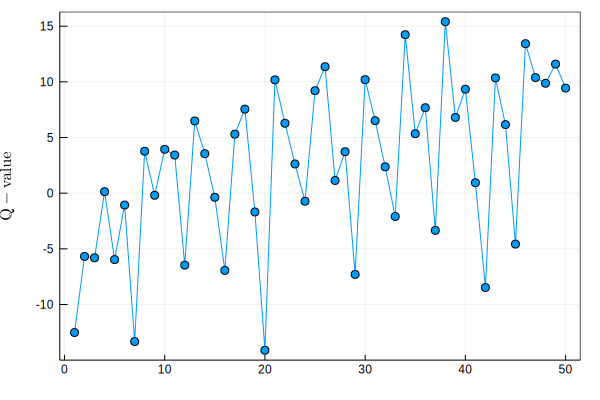

In [89]:
plot(Q_value_E.(b_e_n3[1:50,1], b_e_n3[1:50,2]), 
     xaxis = L"",
     yaxis = L"\rm{Q-value}",
     label = "",
     marker =:circle,
     framestyle = :box)

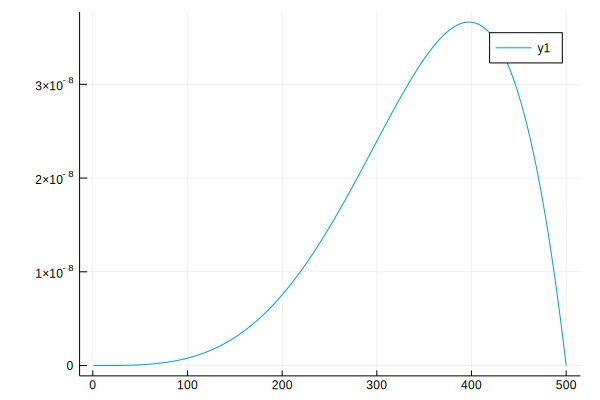

In [90]:
f_int_lamb(A, Z) = [integrand_λ( A,Z,4.0,12.0, (ii/500)*(-Q_value_E(A,Z)) ) for ii = 1:500]
plot( f_int_lamb(50, 20) )

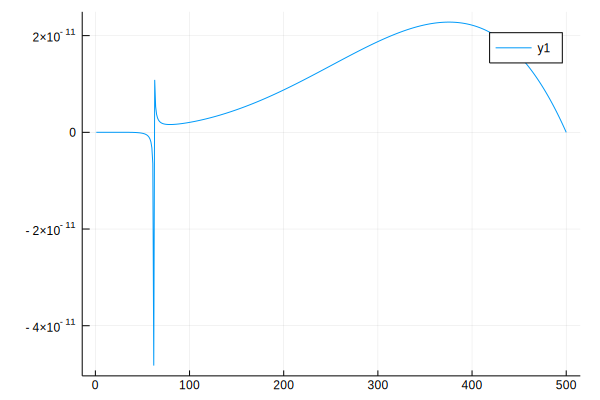

In [91]:
plot( f_int_lamb(77, 33) )

# 結果解析

In [92]:
#     "function  dataset_reshape(b_array::Array{Float64,2})\n",
#     "    max_A = Int(maximum(b_array[:,1]))\n",
#     "    max_Z = Int(maximum(b_array[:,2]))\n",
#     "    β_A_Z = zeros(max_Z,max_A)\n",
#     "    β_A_Z_log = zeros(max_Z,max_A)\n",
#     "    for ii = 1:length(b_array[:,1])\n",
#     "        i_A = Int( b_array[ii,1] )\n",
#     "        i_Z = Int( b_array[ii,2] )\n",
#     "        β_A_Z[i_Z,i_A] = b_array[ii,3]\n",
#     "        β_A_Z_log[i_Z,i_A] = b_array[ii,3]\n",
#     "    end\n",
#     "    println(\"Amax, Zmax, β, log(β)\")\n",
#     "    return( max_A, max_Z, β_A_Z, β_A_Z_log )\n",
#     "end"
function dataset_reshape(b_arr::Array{Float64,2})
    max_A = Int(maximum(b_arr[:,1]))
    max_Z = Int(maximum(b_arr[:,2]))
    β_AZ = zeros(max_Z, max_A)
    for ii = 1:length(b_arr[:,1])
        i_A = Int( b_arr[ii,1] )
        i_Z = Int( b_arr[ii,2] )
        β_AZ[i_Z, i_A] = b_arr[ii,3]
        β_AZ_log[i_Z,i_A] = log(b_arr[ii,3])
    end
end

dataset_reshape (generic function with 1 method)

# Sand Box

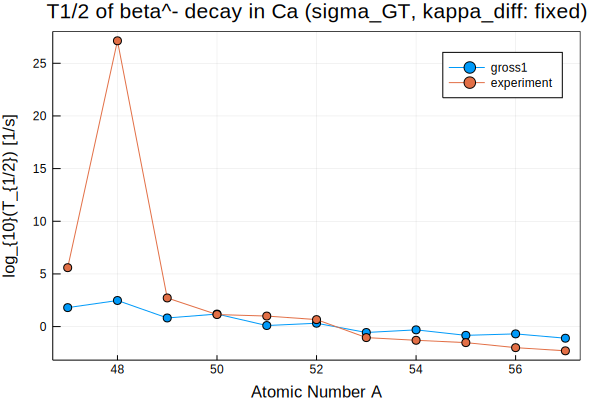

In [93]:
Ca_4757 =  zeros(11)
Ca_4757_Qexp = zeros(11)
for i_A in 47:57
    Ca_4757[i_A - 46] = λ_tot(i_A,20,4.0,12.0)
    Ca_4757_Qexp[i_A - 46] = λ_tot_Qexp(i_A,20,4.0,12.0)
end
Ca_4757

t_Ca = log(2)./Ca_4757
t_log_Ca = log.(10, t_Ca)
x_Ca = [ii for ii in 47:57]

t_Ca_Qexp = log(2)./Ca_4757_Qexp

t_Ca_exp = [392256, 1.36e27, 523.08, 13.9, 10.0, 4.6, 9.0e-2, 5.0e-2, 3.0e-2, 1.0e-2, 5.0e-3]
t_log_Ca_exp = log.(10, t_Ca_exp)

data = [t_log_Ca, t_log_Ca_exp]
labels = ["gross1", "experiment"]
plot(x_Ca, data,
     label = labels,
     xaxis = "Atomic Number A",
     yaxis = "log_{10}(T_{1/2}) [1/s]",
     title = "T1/2 of beta^- decay in Ca (sigma_GT, kappa_diff: fixed)",
     marker = :circle,
     framestyle = :box)

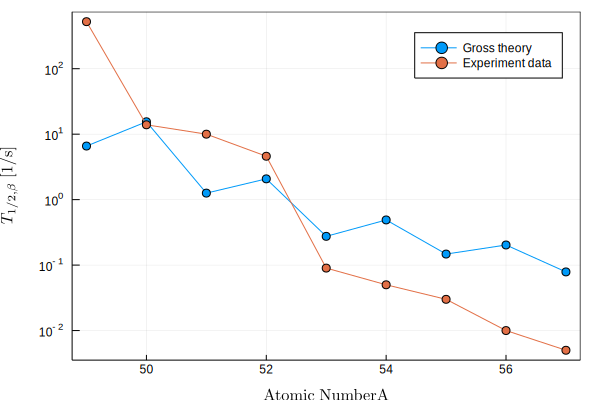

In [94]:
data = [t_Ca[3:end], t_Ca_exp[3:end]]
labels = ["Gross theory", "Experiment data"]
plot(x_Ca[3:end], data,
     label = labels,
     xaxis = L"\rm{Atomic \;Number} A",
     yaxis = L"T_{1/2,\beta} \;[1/\rm{s}]",
     yscale = :log10,
     title = "",
     marker = :circle,
     framestyle = :box)

In [95]:
plot(x_Ca[1:end], [t_Ca[1:end],t_Ca_exp[1:end], [λ_tot_Qexp(i_A,20,4.0,12.0) for i_A = 49:57]], 
    yscale = :log10, 
    marker = :circle, 
    framestyle = :box)

┌ Warning: No strict ticks found
└ @ PlotUtils /Users/Asahi/.julia/packages/PlotUtils/GxT73/src/ticks.jl:173


ArgumentError: ArgumentError: At least one finite value must be provided to formatter.

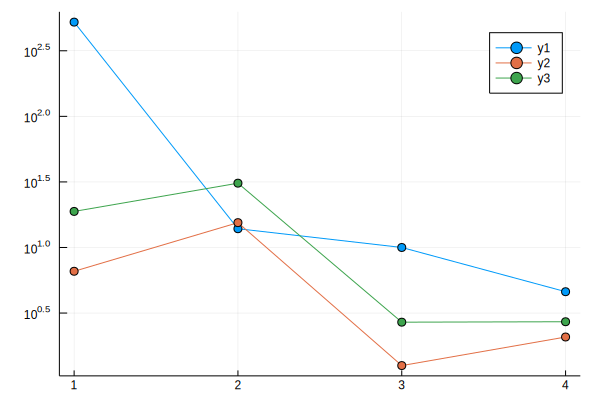

In [96]:
plot([t_Ca_exp[3:6], t_Ca[3:6], log(2)./[λ_tot_Qexp(i_A,20,4.0,12.0) for i_A = 49:52]], marker = :circle, yscale = :log10)

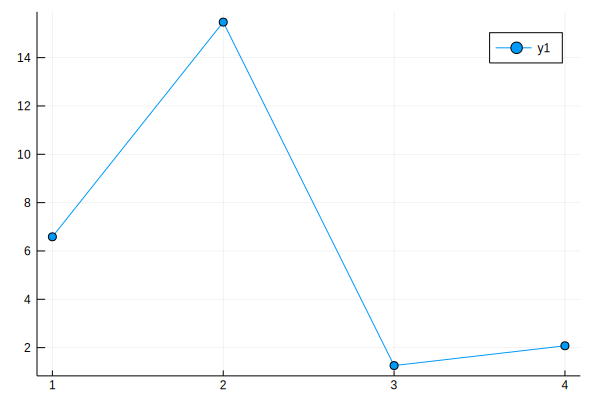

In [97]:
plot(t_Ca[3:6], marker = :circle)

In [98]:
plot(x_Ca, data,
     label = "",
     xaxis = L"\rm{Atomic Number} A",
     yaxis = L"\log_{10}(T_{1/2}) \; [\rm{sec.}]",
     title = L"T_{1/2} \rm{of}\; \beta^- decay\; in\; Ca\; (\sigma_{\rm{GT}}, \kappa_{\rm{diff}}: \; \rm{fixed})",
     framestyle = :box)

BoundsError: BoundsError: attempt to access 9-element Array{Float64,1} at index [1:11]

In [99]:
plot(x_Ca, data,
     label = "",
     xaxis = L"\rm{Atomic Number} A",
     yaxis = L"\log_{10}(T_{1/2}) \; [\rm{sec.}]",
     title = L"T_{1/2} \rm{of}\; \beta^- decay\; in\; Ca\; (\sigma_{\rm{GT}}, \kappa_{\rm{diff}}: \; \rm{fixed})",
     framestyle = :box)

BoundsError: BoundsError: attempt to access 9-element Array{Float64,1} at index [1:11]

In [100]:
誤差_rms_QA(4.0,5.0,b_e_n3[b_e_n3[:,2].==20,:])

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


(3, 2.5857441067603166)

In [101]:
# function hoge_func() #BE: Binding Energy
#     filename = "EMASS_DAT/beta_test.txt"
#     totalrows = countlines(open( filename, "r" ))
#     open( filename, "r" ) do fp
#         u = [[] for ii in 1:totalrows]
#         u_str = ["" for ii in 1:totalrows]
#         u_str_2 = ""
#         u_str_3 = ""
#         cnt = 0
#         for line in eachline( fp )
#             cnt += 1
#             u[cnt] = split(line, "\t")
#             u_str[cnt] = string(u[cnt])
#             u_str_2 = split(u_str[cnt], r"\s+")[2] 
#             u_str_3 = split(u_str[cnt], r"\s+")[3] 
#         end
#         u_str_2
#     end
# end
# hoge_func()

In [102]:
function hoge_func2() #BE: Binding Energy
    filename = "EMASS_DAT/beta_test.txt"
    totalrows = countlines(open( filename, "r" ))
    open( filename, "r" ) do fp
        u = [[] for ii in 1:totalrows]
        u_str = ["" for ii in 1:totalrows]
        u_str_2 = ""
        u_str_3 = ""
        cnt = 0
        for line in eachline( fp )
            cnt += 1
            u[cnt] = split(line, "\t")
            u_str[cnt] = string(u[cnt])
            u_str_2 = split(u_str[cnt], r"\s+")[2] 
#             u_str_3 = split(u_str[cnt], r"\s+")[3] 
        end
        u_str_2
    end
end
hoge_func2()

"33S"

## 実験データ整備

In [103]:
using ProgressMeter
function running(n_iterations)
    progress = Progress(n_iterations)
    sum = 0
    for n in 1:n_iterations
        sum += n # ここに何か処理
        next!(progress)
    end
    sum
end

# running(100)

running (generic function with 1 method)

In [104]:
open("EMASS_DAT/hoge_v2", "w") do fp
    hoge_lis = [ 1 2 3; 4 5 6; 7 8 9]
    for ii = 1:length(hoge_lis[:,1])
        for jj in hoge_lis[ii,:]
            print(fp, jj," ")
        end
        print(fp, "\n")
    end
end

In [105]:
for ii in [1,2,3]
    println(ii)
end

1
2
3


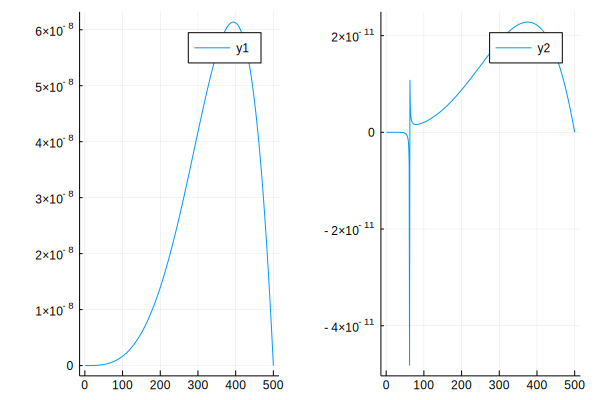

In [106]:
data = [f_int_lamb(77,30), f_int_lamb(77,33)]
plot(data, layout=2)

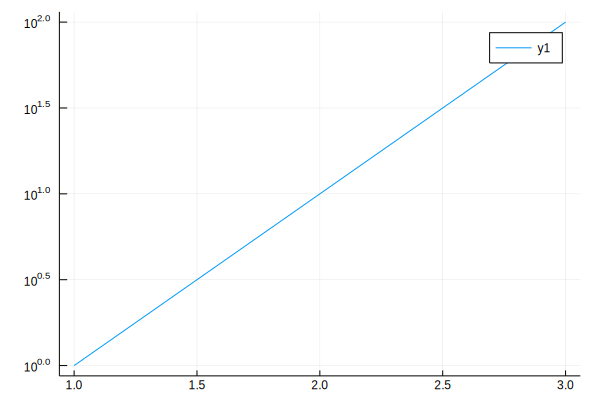

In [107]:
using Plots
Plots.gr()
plot([1,10,100], yscale = :log10)

In [108]:
function 計算可能なλ_2(array,κ差,σ_GT)
    l_th = []
    prog = Progress( Int(length(array) / 3) )
    for ii in 1:Int(length(array) / 3)
        lambda_tot = 計算可能なλ(array[ii,1],array[ii,2],κ差,σ_GT)
        if lambda_tot != 0.0
            append!(l_th, lambda_tot)
        end
        next!(prog)
    end
    return l_th
end

計算可能なλ_2 (generic function with 1 method)

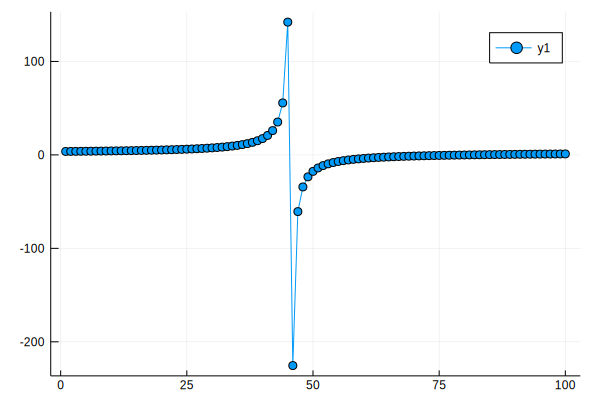

In [109]:
fermi_z = [fermi_func(((ii/100)*10 + 35), 1.2) for ii = 1:100]
using Plots
Plots.gr()
plot(fermi_z, marker=:circle, )

In [110]:
function d_f_int(A,Z)
    li_fint = f_int_lamb(A,Z)
    len = length(li_fint) - 1
    d_list = zeros(len)
    progress = Progress(len)
    for ii = 1:len
        d_list[ii] = abs( li_fint[ii] - li_fint[ii + 1] )
        next!(progress)
    end
    d_list
end

d_f_int (generic function with 1 method)

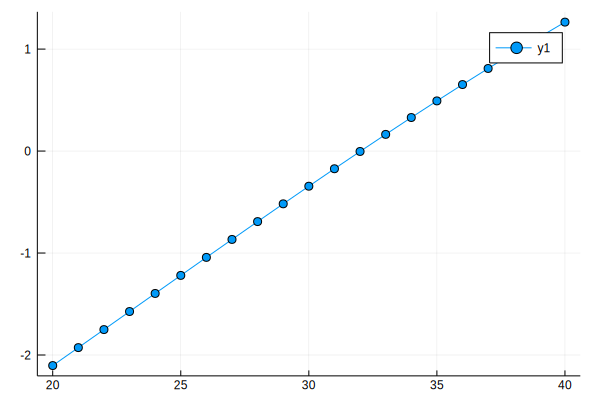

In [111]:
E_00_i = [E_00(ii) for ii = 20:40]
x = [ii + 19 for ii = 1:21]
plot(x, E_00_i, marker =:circle)

In [112]:
function try_lamb(A,Z,κ差,σ_GT)
    println("begin")
    try
        return λ_tot(A,Z,κ差,σ_GT)
    catch e
        nothing
    end
    println("end")
end


try_lamb (generic function with 1 method)

In [113]:
function find_peak(d_array)
    peak_val = findmax( d_array[1:100] )[1]
    peak_ind = findmax( d_array[1:100] )[2]
    
    peak_around_lis = [d_array[peak_ind + ii] for ii = -3:3]
    peak_around_mean = mean( peak_around_lis )
    
    peak_except_lis  = vcat( [d_array[ii] for ii = 1:peak_ind - 4], [d_array[ii] for ii = peak_ind+4 : 100] )
    peak_except_mean = mean( peak_except_lis )
    
    return (peak_around_mean, peak_except_mean, peak_around_mean / peak_except_mean)
end

find_peak (generic function with 1 method)

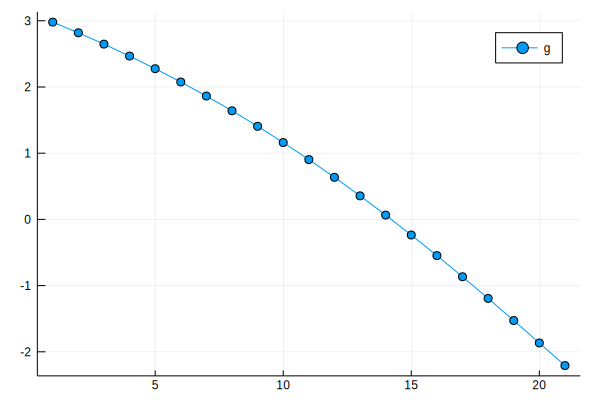

In [114]:
a_z = [a(ii) for ii = 20:40]
c_z = [c(ii) for ii = 20:40]
d_z = [d(ii, 0.2) for ii = 20:40]
g_z = [g(ii, 0.2) for ii = 20:40]
frac_g_z = [(1 / g(ii, 0.3)) for ii = 20:40]
ag_z = [ag(ii, 0.2) for ii = 20:40]
data = [a_z, c_z, d_z, g_z, frac_g_z, ag_z]
labels = ["a", "c", "d", "g", "frac_g", "ag"]
using Plots
Plots.gr()
plot(data[4], label = labels[4], marker=:circle)

In [115]:
fu(x,y) = x + y
hoge = [1 2 3; 4 5 6]
foo = hcat(hoge[:,1], hoge[:,2], fu.(hoge[:,1],hoge[:,2]))

2×3 Array{Int64,2}:
 1  2  3
 4  5  9

In [116]:
# fu(x) = x + 1
# hoge = [1 2 3; 4 5 6]
# foo = hcat(hoge[:,1], hoge[:,2], fu.(hoge[:,3]))
function make_beta_th_arr(kappa_d::Float64, sigma_gt::Float64,array)
    return hcat(array[:,1], array[:,2], 
                計算可能なλ.( convert(Array{Int64,1}, array[:,1]), convert(Array{Int64,1}, array[:,2]), kappa_d::Float64, sigma_gt::Float64) )
end

make_beta_th_arr (generic function with 1 method)

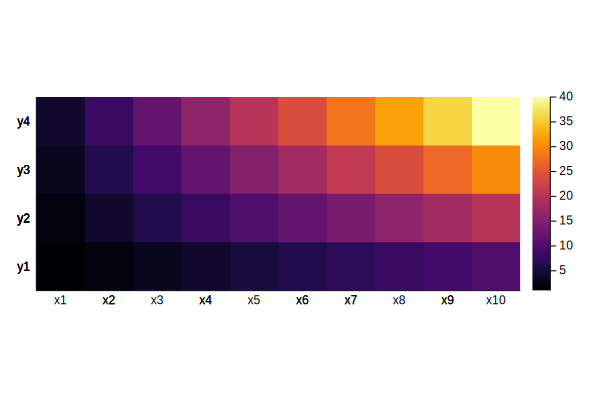

In [117]:
xs = [string("x", i) for i = 1:10]
ys = [string("y", i) for i = 1:4]
z = float((1:4) * reshape(1:10, 1, :))
heatmap(xs, ys, z, aspect_ratio=1)

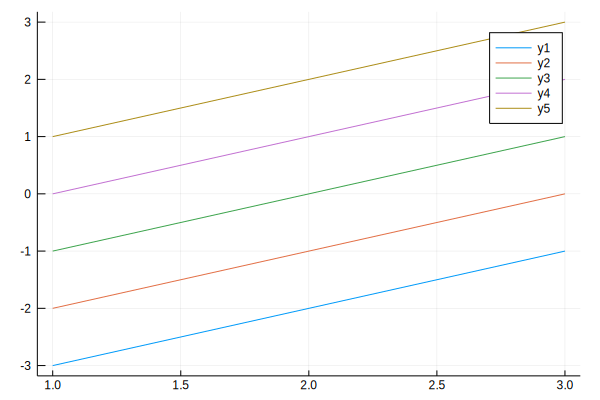

In [118]:
plot( [ii + jj for ii=-1:1, jj=-2:2] )

In [119]:
# function time_access_1(n::Int)
#     hoge_arr = zeros(n,n)
#     for ii = 1:n
#         for jj = 1:n
#         hoge_arr[ii,jj] = ii+jj
#         end
#     end
#     return hoge_arr
# end

In [120]:
@time Q_value_E_Qexp.(Int.(b_e_n3[:,1]),Int.(b_e_n3[:,2]))

142.670353 seconds (715.66 M allocations: 35.744 GiB, 9.12% gc time)


433-element Array{Float64,1}:
   -12.685700000000024 
    -5.582600000000041 
    -5.491999999999989 
     0.1671999999999525
    -5.966099999999954 
    -1.1420999999999981
   -12.805499999999965 
     4.865199999999988 
    -0.8137999999999852
     2.937100000000016 
     4.916500000000014 
    -5.913800000000008 
     6.640200000000022 
     ⋮                 
 -1787.614             
     2.187999999999847 
    -1.384899999999816 
    -0.7511999999999535
 -1822.575             
    -2.262199999999921 
    -1.3515999999999895
 -1857.0037            
 -1862.5895            
 -1890.2032            
    -2.1339999999998147
     0.7825            

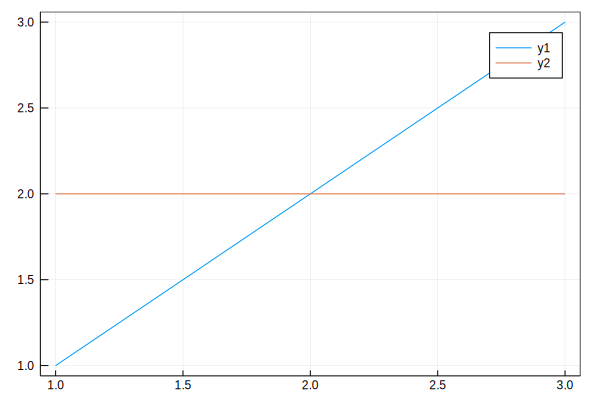

In [121]:
plot([[1,2,3],[2,2,2]], framestyle = :box)

In [122]:
hoge = [1,2,3]
!true

false

`Mojule`の練習

In [123]:
?module

search: module Module @__MODULE__ baremodule parentmodule



```
module
```

`module` declares a `Module`, which is a separate global variable workspace. Within a module, you can control which names from other modules are visible (via importing), and specify which of your names are intended to be public (via exporting). Modules allow you to create top-level definitions without worrying about name conflicts when your code is used together with somebody else’s. See the [manual section about modules](@ref modules) for more details.

# Examples

```julia
module Foo
import Base.show
export MyType, foo

struct MyType
    x
end

bar(x) = 2x
foo(a::MyType) = bar(a.x) + 1
show(io::IO, a::MyType) = print(io, "MyType $(a.x)")
end
```


In [124]:
push!(LOAD_PATH,"PATH/TO/MOD_DIR")

4-element Array{String,1}:
 "@"              
 "@v#.#"          
 "@stdlib"        
 "PATH/TO/MOD_DIR"

In [125]:
?struct

search: struct isstructtype mutable struct unsafe_trunc



```
struct
```

The most commonly used kind of type in Julia is a struct, specified as a name and a set of fields.

```julia
struct Point
    x
    y
end
```

Fields can have type restrictions, which may be parameterized:

```julia
    struct Point{X}
        x::X
        y::Float64
    end
```

A struct can also declare an abstract super type via `<:` syntax:

```julia
struct Point <: AbstractPoint
    x
    y
end
```

`struct`s are immutable by default; an instance of one of these types cannot be modified after construction. Use [`mutable struct`](@ref) instead to declare a type whose instances can be modified.

See the manual section on [Composite Types](@ref) for more details, such as how to define constructors.


In [126]:
?module

search: module Module @__MODULE__ baremodule parentmodule



```
module
```

`module` declares a `Module`, which is a separate global variable workspace. Within a module, you can control which names from other modules are visible (via importing), and specify which of your names are intended to be public (via exporting). Modules allow you to create top-level definitions without worrying about name conflicts when your code is used together with somebody else’s. See the [manual section about modules](@ref modules) for more details.

# Examples

```julia
module Foo
import Base.show
export MyType, foo

struct MyType
    x
end

bar(x) = 2x
foo(a::MyType) = bar(a.x) + 1
show(io::IO, a::MyType) = print(io, "MyType $(a.x)")
end
```


In [127]:
?計算可能なλ

"計算可能なλ" can be typed by 計算可能な\lambda<tab>

search: 計算可能なλ 計算可能なλ_2 計算可能なλ_Qexp4 計算可能なλ_Qexp2



No documentation found.

`計算可能なλ` is a `Function`.

```
# 1 method for generic function "計算可能なλ":
[1] 計算可能なλ(A::Int64, Z::Int64, κ差, σ_GT) in Main at In[42]:2
```


In [128]:
const hoge_lis = [1,2,3]
hoge_lis[2] = 99

99

In [129]:
function 誤差(kappa_d::Float64, sigma_gt::Float64, array)
    progress = Progress( Int( length( array ) / 3 ) )
    sum = 0.0
    for ii = 1 : Int( length( array ) / 3 )
        A = Int64( array[ii,1] )
        Z = Int64( array[ii,2] )
        max_mean = maximum(d_f_int(A,Z)) / mean( d_f_int(A,Z) )
        if Q_value_E(A,Z) > 0 #&& max_mean < 50.0
            sum += abs2(λ_tot(A, Z, kappa_d::Float64, sigma_gt::Float64) - array[ii,3])
#             sum_i[ii] = abs2(λ_tot(A, Z, kappa_d::Float64, sigma_gt::Float64) - array[ii,3])
        end
        next!(progress)
    end
    return sum
end

誤差 (generic function with 1 method)

In [130]:
# function plot_diff_intg_l(A,Z)
#     integrand_lambda_i = [integrand_λ(A,Z,4.0,12.0, -(ii/400)*(Q_value_E(A,Z))) for ii = 1:400]
#     diff_intg = [ abs(integrand_lambda_i[ii+1] - integrand_lambda_i[ii])  for ii = 1:399]
#     x_intg2 = [0.0 + (ii/400)*(Q_value_E(A,Z)) for ii = 1:399]
# #     return maximum(diff_intg)
#     plot(x_intg2, diff_intg,
#          xaxis = "-E = 0:Q-value",
#          label = "",
#          title = "differential A=$A, Z=$Z")
# end

# function plot_diff_intg_l(A,Z)
#     integrand_lambda_i = [integrand_λ(A,Z,4.0,12.0, -(ii/400)*(Q_value_E(A,Z))) for ii = 1:400]
#     diff_intg = [ abs(integrand_lambda_i[ii+1] - integrand_lambda_i[ii])  for ii = 1:399]
#     x_intg2 = [0.0 + (ii/400)*(Q_value_E(A,Z)) for ii = 1:399]
# #     return maximum(diff_intg)
#     plot(x_intg2, diff_intg,
#          xaxis = "-E = 0:Q-value",
#          label = "",
#          title = "differential A=$A, Z=$Z")
# end

# max_mean_diff_intg_l(78,33)

# function diff_intg_l(A,Z)
#     integrand_lambda_i = [integrand_λ(A,Z,4.0,12.0, -(ii/400)*(Q_value_E(A,Z))) for ii = 1:400]
#     return diff_intg = [abs(integrand_lambda_i[ii+1] - integrand_lambda_i[ii])  for ii = 1:399]
# end
# plot( diff_intg_l(95,40)[270:300], marker = :circle)

# plot( diff_intg_l(95,40) )

# plot( diff_intg_l(78,33) )

# findmax(diff_intg_l(78,33)[1:100])[2]
# lis = [diff_intg_l(78,33)[findmax(diff_intg_l(78,33)[1:100] )[2] + ii] for ii = -3:3]

In [131]:
print("hogehoge")

hogehoge

data作成の痕跡

In [132]:
# filename = "beta_data_1-50"
# totalrows = countlines(open( filename, "r" ))
# beta_exp_10 = zeros(totalrows,3)
# open( filename, "r" ) do fp
#     cnt = 0
#     for line in eachline( fp )
#         cnt += 1
#         beta_exp_10[cnt,1] = half_lives_pre(line)[1]
#         beta_exp_10[cnt,2] = half_lives_pre(line)[2]
#         beta_exp_10[cnt,3] = half_lives_pre(line)[3]
#     end
#     beta_exp_10
# end
# beta_exp_10[1]

# filename = "beta_data_51-90"
# totalrows = countlines(open( filename, "r" ))
# beta_exp_20 = zeros(totalrows,3)
# open( filename, "r" ) do fp
#     cnt = 0
#     for line in eachline( fp )
#         cnt += 1
#         for ii = 1:3
#             beta_exp_20[cnt,ii] = half_lives_pre(line)[ii]
#         end
#     end
#     beta_exp_20
# end
# beta_exp_20[1]

# filename = "beta_data_91-130"
# totalrows = countlines(open( filename, "r" ))
# beta_exp_30 = zeros(totalrows,3)
# open( filename, "r" ) do fp
#     cnt = 0
#     for line in eachline( fp )
#         cnt += 1
#         for ii = 1:3
#             beta_exp_30[cnt,ii] = half_lives_pre(line)[ii]
#         end
#     end
#     beta_exp_30
# end
# beta_exp_30[1]

# filename = "beta_data_131-170"
# totalrows = countlines(open( filename, "r" ))
# beta_exp_40 = zeros(totalrows,3)
# open( filename, "r" ) do fp
#     cnt = 0
#     for line in eachline( fp )
#         cnt += 1
#         for ii = 1:3
#             beta_exp_40[cnt,ii] = half_lives_pre(line)[ii]
#         end
#     end
#     beta_exp_40
# end
# beta_exp_40[1]

# filename = "beta_data_171-210"
# totalrows = countlines(open( filename, "r" ))
# beta_exp_50 = zeros(totalrows,3)
# open( filename, "r" ) do fp
#     cnt = 0
#     for line in eachline( fp )
#         cnt += 1
#         for ii = 1:3
#             beta_exp_50[cnt,ii] = half_lives_pre(line)[ii]
#         end
#     end
#     beta_exp_50
# end
# beta_exp_50[1]

# filename = "beta_data_211-250"
# totalrows = countlines(open( filename, "r" ))
# beta_exp_60 = zeros(totalrows,3)
# open( filename, "r" ) do fp
#     cnt = 0
#     for line in eachline( fp )
#         cnt += 1
#         for ii = 1:3
#             beta_exp_60[cnt,ii] = half_lives_pre(line)[ii]
#         end
#     end
#     beta_exp_60
# end
# beta_exp_60[1]

# filename = "beta_data_251-300"
# totalrows = countlines(open( filename, "r" ))
# beta_exp_70 = zeros(totalrows,3)
# open( filename, "r" ) do fp
#     cnt = 0
#     for line in eachline( fp )
#         cnt += 1
#         for ii = 1:3
#             beta_exp_70[cnt,ii] = half_lives_pre(line)[ii]
#         end
#     end
#     beta_exp_70
# end
# beta_exp_70[1]

# filename = "beta_data_301-350"
# totalrows = countlines(open( filename, "r" ))
# beta_exp_80 = zeros(totalrows,3)
# open( filename, "r" ) do fp
#     cnt = 0
#     for line in eachline( fp )
#         cnt += 1
#         for ii = 1:3
#             beta_exp_80[cnt,ii] = half_lives_pre(line)[ii]
#         end
#     end
#     beta_exp_80
# end
# beta_exp_80[1]

# filename = "beta_data_351-400"
# totalrows = countlines(open( filename, "r" ))
# beta_exp_90 = zeros(totalrows,3)
# open( filename, "r" ) do fp
#     cnt = 0
#     for line in eachline( fp )
#         cnt += 1
#         for ii = 1:3
#             beta_exp_90[cnt,ii] = half_lives_pre(line)[ii]
#         end
#     end
#     beta_exp_90
# end
# beta_exp_90[1]

# filename = "beta_data_401-450"
# totalrows = countlines(open( filename, "r" ))
# beta_exp_100 = zeros(totalrows,3)
# open( filename, "r" ) do fp
#     cnt = 0
#     for line in eachline( fp )
#         cnt += 1
#         for ii = 1:3
#             beta_exp_100[cnt,ii] = half_lives_pre(line)[ii]
#         end
#     end
#     beta_exp_100
# end
# beta_exp_100[1]

# filename = "beta_data_451-500"
# totalrows = countlines(open( filename, "r" ))
# beta_exp_110 = zeros(totalrows,3)
# open( filename, "r" ) do fp
#     cnt = 0
#     for line in eachline( fp )
#         cnt += 1
#         for ii = 1:3
#             beta_exp_110[cnt,ii] = half_lives_pre(line)[ii]
#         end
#     end
#     beta_exp_110
# end
# beta_exp_110[1]

# filename = "beta_data_501-550"
# totalrows = countlines(open( filename, "r" ))
# beta_exp_120 = zeros(totalrows,3)
# open( filename, "r" ) do fp
#     cnt = 0
#     for line in eachline( fp )
#         cnt += 1
#         for ii = 1:3
#             beta_exp_120[cnt,ii] = half_lives_pre(line)[ii]
#         end
#     end
#     beta_exp_120
# end
# beta_exp_120[1]

# filename = "beta_data_551-577"
# totalrows = countlines(open( filename, "r" ))
# beta_exp_130 = zeros(totalrows,3)
# open( filename, "r" ) do fp
#     cnt = 0
#     for line in eachline( fp )
#         cnt += 1
#         for ii = 1:3
#             beta_exp_130[cnt,ii] = half_lives_pre(line)[ii]
#         end
#     end
#     beta_exp_130
# end
# beta_exp_130[1]